## Introduction

This an analysis of users' visits and orders of a big online store. Together with the marketing department, I've compiled a list of hypotheses that may help boost the store's revenue.
Hereinafter I will prioritize the hypotheses, launch an A/B test and analyze the results.

## Description of Data

The Data in this analysis is in three data frames: 

1. Hypotheses:

* Hypotheses — brief descriptions of the hypotheses;

* Reach — user reach, on a scale of one to ten;

* Impact — impact on users, on a scale of one to ten;

* Confidence — confidence in the hypothesis, on a scale of one to ten;

* Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

2. Orders:

* transactionId — order identifier;

* visitorId — identifier of the user who placed the order;

* date — of the order;

* revenue — from the order;

* group — the A/B test group that the user belongs to.

3. Visits:

* date — date;

* group — A/B test group;

* visits — the number of visits on the date specified in the A/B test group specified.

## Loading and Initial Exploration of the Data

In [1]:
import pandas as pd
import random
#import sidetable
import math as mt
import matplotlib
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats
from random import sample
from functools import reduce
from scipy import stats as st
from scipy.stats import levene
import matplotlib.pyplot as plt
from itertools import chain,cycle
from IPython.display import display_html

In [2]:
hypotheses = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 6/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 6/orders_us.csv')
visits = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 6/visits_us.csv')

Above I loaded the three data frames, named them "hypotheses", "orders" and "visits" and separated the columns in the the "hypotheses" data frame. 

Hereinafter I will do a short exploration of the data frames. 

In [3]:
hypotheses.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypotheses.describe(include='all', datetime_is_numeric=True).fillna('N/A').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hypothesis,9,9,Add two new channels for attracting traffic. T...,1,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Reach,9.0,N/A,N/A,N/A,4.777778,3.153481,1.0,3.0,3.0,8.0,10.0
Impact,9.0,N/A,N/A,N/A,4.777778,3.192874,1.0,3.0,3.0,7.0,10.0
Confidence,9.0,N/A,N/A,N/A,5.555556,3.045944,1.0,3.0,7.0,8.0,9.0
Effort,9.0,N/A,N/A,N/A,4.888889,2.803767,1.0,3.0,5.0,6.0,10.0


In [5]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


As we can see, in the "hypotheses" data frame we have 9 rows and 5 columns. This data frame seems intact. 

In [6]:
orders.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
orders.describe(include='all', datetime_is_numeric=True).fillna('N/A').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transactionId,1197.0,N/A,N/A,N/A,2155621385.529657,1229084904.760058,1062393.0,1166775572.0,2145193898.0,3237740112.0,4293855558.0
visitorId,1197.0,N/A,N/A,N/A,2165960143.099415,1236014192.14687,5114589.0,1111826046.0,2217984702.0,3177606451.0,4283872382.0
date,1197,31,2019-08-05,48,N/A,N/A,N/A,N/A,N/A,N/A,N/A
revenue,1197.0,N/A,N/A,N/A,131.491646,603.004729,5.0,20.8,50.2,130.4,19920.4
group,1197,2,B,640,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


The "orders" data frame has 1197 rows and 5 columns, 2 unique groups and 31 unique dates. The values in the "date" column are not in the correct data type and some of the letters in the column names are in capital letters. 

In [9]:
visits.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visits.describe(include='all', datetime_is_numeric=True).fillna('N/A').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,62,31,2019-08-01,2,N/A,N/A,N/A,N/A,N/A,N/A,N/A
group,62,2,A,31,N/A,N/A,N/A,N/A,N/A,N/A,N/A
visits,62.0,N/A,N/A,N/A,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


In [11]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


The "visits" data frame has 62 rows and 3 columns, 2 unique groups and 31 unique dates. The values in the "date" column are not in the correct data type. 

### Summary

Overall, the data seems intact, except for some incorrect data types and capital letters in columns' names - the are no visible missing values.

## Data Preprocessing

### Orders

In [12]:
orders.columns = orders.columns.str.lower() 
orders.head()


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


Above, I changed all the letters in the "orders" data frame to lowercase, so they will be easier to work with and printed a sample of the data frame to check that the columns' names were indeed turned to lower case. 

In [13]:
orders.duplicated().sum()

0

I checked if there were any duplicate row in the data frame, there weren't any. 

In [14]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info('deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


I turned the values in the "date" column to datetime by mapping a lambda function. 

In [15]:
two_grouped = orders.groupby(['visitorid']).agg({'group': 'nunique'}).sort_values(by='group', ascending=False).query('group > 1').reset_index()
two_grouped.head()


,visitorid,group
0,2654030115,2
1,3891541246,2
2,3941795274,2
3,1404934699,2
4,351125977,2


I created a table by grouping the "visitorid" column and counting each user's unique number of groups. As we can see, some users have two unique groups - both A and B.

In [16]:
two_grouped['visitorid'].nunique()

58

There are 58 users with two groups. 

In [17]:
filtered_orders = orders[~orders.visitorid.isin(two_grouped['visitorid'])]


In [18]:
filtered_orders.groupby(['visitorid']).agg({'group': 'nunique'}).sort_values(by='group', ascending=False).query('group > 1').reset_index()


,visitorid,group


I created a filtered data frame of "orders" without the double grouped users and checked whether there are any of them in the filtered data frame - there aren't any. 

In [19]:
filtered_orders.info('deep')
print()
print("Once filtered, {} visitorids were dropped and {} rows were removed from the 'orders' data frame.".format(two_grouped['visitorid'].nunique(), len(orders)-len(filtered_orders)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB

Once filtered, 58 visitorids were dropped and 181 rows were removed from the 'orders' data frame.


### Visits

In [20]:
visits.duplicated().sum()

0

I checked if there were any duplicate row in the data frame, there weren't any. 

In [21]:
visits.groupby(['date']).agg({'group': 'count'}).sort_values(by='group', ascending=False).query('group > 2').reset_index()


,date,group


In [22]:
visits.groupby(['date']).agg({'group': 'nunique'}).sort_values(by='group', ascending=False).query('group > 2').reset_index()


,date,group


Above I checked whether there are dates with more than 3 groups or more than 2 unique groups - there are none.


In [23]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits.info('deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


I turned the values in the "date" column to datetime by mapping a lambda function. 

### Summary

In the data preprocessing I took the following steps: 
* I turned the columns' names of the "orders" data frame to lowercase letters. 
* I checked for duplicated rows in both the "orders" and "visits" data frames, there weren't any.
* I changed the data type of the "date" column in the "orders" and "visits" data frames to datetime.
* I created a new data frame called "filtered_orders" with which I will now work, which has no users who are both members of group A and group B. Thus, this data frame now has 1016 rows and 5 columns. 


## Part 1 - Prioritizing Hypotheses

The "hypotheses" data frame contains nine hypotheses on boosting an the store's revenue with Reach, Impact, Confidence, and Effort specified for each - numbered from 1 to 10.


Impact, confidence, effort/ease (ICE)

RICE has four components:
Reach — how many users will be affected by the update you want to introduce
Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product
Confidence — how sure you are that your product will affect them in this way
Effort — how much will it cost to test the hypothesis


In [24]:
pd.set_option('display.max_colwidth', None)
hypotheses.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


I printed the table before I calculate ICE/RICE priorities. 

### Calculating ICE Priority

ICE has three components: 
* Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product;
* Confidence — how sure you are that your product will affect them in this way;
* Effort/Ease — how much will it cost to test the hypothesis.

ICE is calculated by multiplying Impact by Confidence and dividing by Effort. 

Hereinafter I will check each hypothesis's ICE priority.

In [25]:
hypotheses['ICE'] = ((hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']).round(3)

I calculated the ICE priority in a newly created "ICE" column.

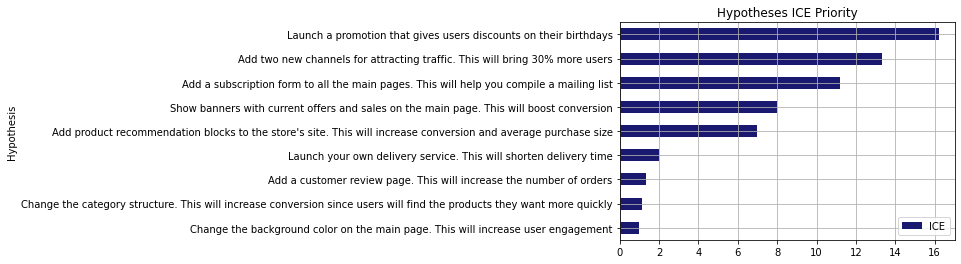

In [26]:
hypotheses[['Hypothesis','ICE']].sort_values(by='ICE').plot(x='Hypothesis',y='ICE', kind='barh',grid=True ,title='Hypotheses ICE Priority', color='midnightblue')
plt.show()

As we can see, the hypothesis with the highest ICE priority is hypothesis 8, next are 0 and 7, while the hypotheses with the lowest ICE priority are 5, 3 and 4. 

### Calculating RICE Priority


RICE has four components:
* Reach — how many users will be affected by the update you want to introduce;
* Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product;
* Confidence — how sure you are that your product will affect them in this way;
* Effort — how much will it cost to test the hypothesis.

RICE is calculated by multiplying Reach and Impact by Confidence and dividing by Effort. 

Hereinafter I will check each hypothesis's RICE priority.

In [27]:
hypotheses['RICE'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']

I calculated the RICE priority in a newly created "RICE" column.

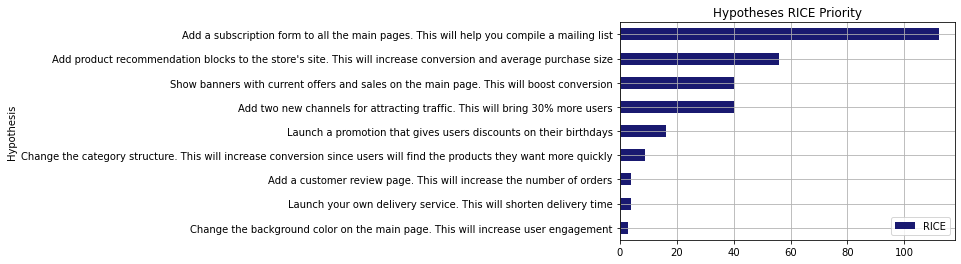

In [28]:
hypotheses[['Hypothesis','RICE']].sort_values(by='RICE').plot(x='Hypothesis',y='RICE', kind='barh',grid=True ,title='Hypotheses RICE Priority', color='midnightblue')
plt.show()

As we can see, the hypothesis with the highest RICE priority is hypothesis 7, next are 2 and 6, while the hypotheses with the lowest RICE priority are 5, 1 and 4. 

### Comparing ICE and RICE Priorities

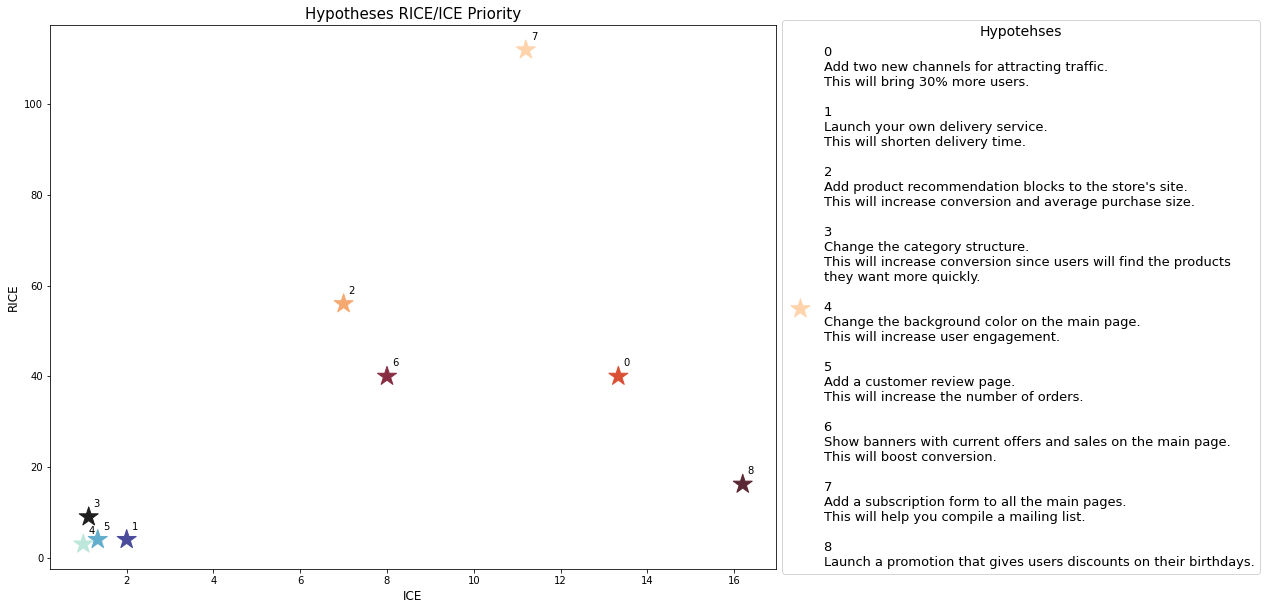

In [29]:
hyp_piv = hypotheses.pivot_table(index = [hypotheses.index], values = ['ICE', 'RICE'], aggfunc = 'sum').sort_values(by='RICE', ascending=False)
plt.figure(figsize=(13, 10))
x = hyp_piv.ICE
y = hyp_piv.RICE
colors = np.array([10, 20, 40, 60, 70, 90, 120, 150, 170])
plt.scatter(x, y, c=colors,cmap='icefire_r', marker='*', s=400)
labels = ["7", "2", "0", "6", "8", "3", "1", "5", "4"]

 
for x_pos, y_pos, label in zip(x, y, labels):
    plt.annotate(label, xy=(x_pos, y_pos), xytext=(5, 8), textcoords='offset points', ha='left', va='bottom')       


plt.title('Hypotheses RICE/ICE Priority', size=15)
plt.ylabel('RICE', size=12)
plt.xlabel('ICE', size=12)
plt.legend(["""0  
Add two new channels for attracting traffic. 
This will bring 30% more users.

1 
Launch your own delivery service. 
This will shorten delivery time.

2 
Add product recommendation blocks to the store's site. 
This will increase conversion and average purchase size.

3 
Change the category structure. 
This will increase conversion since users will find the products 
they want more quickly.

4 
Change the background color on the main page. 
This will increase user engagement.

5 
Add a customer review page. 
This will increase the number of orders.

6  
Show banners with current offers and sales on the main page. 
This will boost conversion.

7 
Add a subscription form to all the main pages. 
This will help you compile a mailing list.

8 
Launch a promotion that gives users discounts on their birthdays."""], loc='center left',bbox_to_anchor=(1, 0.5), title="Hypotehses", fontsize=13, title_fontsize=14)
plt.show()


As noted before hypothesis with the highest ICE priority is hypothesis 8, next are 0 and 7, while the hypothesis with the highest RICE priority is hypothesis 7, next are 2 and 6.

The hypotheses with the lowest ICE priority are 5, 3 and 4, and those with the lowest RICE priority are 5, 1 and 4. 

The only difference between the two is: **R for Reach - how many users will be affected by the update**.

If the R is high, then the priority rises - for example, hypothesis 7 is to add a subscription form that will help the store compile a mailing list - this has the highest reach value, meaning you will reach all users that subscribe. This hypothesis is has also medium-high impact and confidence values and medium effort value - making it third in ICE priorities. 

On the other hand, hypotheses 8 and 0, the first and second highest ICE priorities have low reach values, 1 and 3, respectively. Hypothesis 8 will only reach certain users at certain times (on their birthdays) and hypothesis 0, by its own account, will reach only 30% of users. 

Hypotheses 2 and 6, second and third highest RICE priorities have 8 and 5 reach values, respectively. Both aim to boost the conversion of users to buyers. Even though hypothesis 6 has medium reach value it is high in confidence and low on effort - making it a win-win. 

Another glaring difference in ICE/RICE priority are hypotheses 3 and 1, both the second to last in each. Hypothesis 3 has low impact and low confidence (both 3) and high effort - making it low in ICE priority. However, since by nature it will reach all users using the store's website, it has high reach value - removing it from the bottom 3 in RICE priority.

Hypothesis 1 has medium impact and confidence values and very high effort value (10) - in addition, its reach value is low (2). It might seem that adding a delivery service will affect a lot of users. But perhaps this service will be pricier than other delivery options given the store's online customers and they will prefer longer delivery at lower cost - hence the low reach. 




## Part 2 - A/B Test Analysis


Hereinafter I will analyze the A/B test. 


### Cumulative Revenue per Group

#### Calculating and Graphing Cumulative Revenue per Group

In [30]:
datesg = filtered_orders[['date','group']] 
datesg.info('deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1016 non-null   datetime64[ns]
 1   group   1016 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 23.8+ KB


In [31]:
datesg = filtered_orders[['date','group']].drop_duplicates()
datesg.info('deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 1150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ KB


I built an array with unique paired date/group values using drop_duplicates(), and called it "datesg".

In [32]:
o_aggregated = datesg.apply(lambda x: filtered_orders
                            [np.logical_and(filtered_orders['date'] <= x['date'], filtered_orders
                            ['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' 
                            : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), 
                            axis=1).sort_values(by=['date','group'])
o_aggregated.head()


,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


I found the number of unique order and user IDs (transactionid and visitorid) and calculated the sum of average purchase sizes per date per group from the "filtered_orders" data frame that are in the dates and groups  in "datesg" - I called the table "o_aggregated".

In [33]:
v_aggregated = datesg.apply(lambda x: visits
                            [np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg
                            ({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
v_aggregated.head()


,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


I did a similar calculation with the "visits" data frame, only summing the each group's visits each date. I called this table "v_aggregated". 

In [34]:
d_cumulative = o_aggregated.merge(v_aggregated, left_on=
                                  ['date', 'group'], right_on=['date', 'group']).rename(columns=
                                  {'transactionid': 'orders', 'visitorid':'buyers'})
d_cumulative.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


I merged "o_aggregated" and "v_aggregated" on the "date" and "group" columns and changed the names of the columns to "orders" and "buyers".

In [35]:
cumulative_ra = d_cumulative[d_cumulative['group']=='A'][['date','revenue', 'orders']]
cumulative_ra.head()


,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99


In [36]:
cumulative_rb = d_cumulative[d_cumulative['group']=='B'][['date','revenue', 'orders']]
cumulative_rb.head()


,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


Above, I divided the "d_cumulative" table into two tables - one for group A ("cumulative_ra") and one for group B ("cumulative_rb"). 

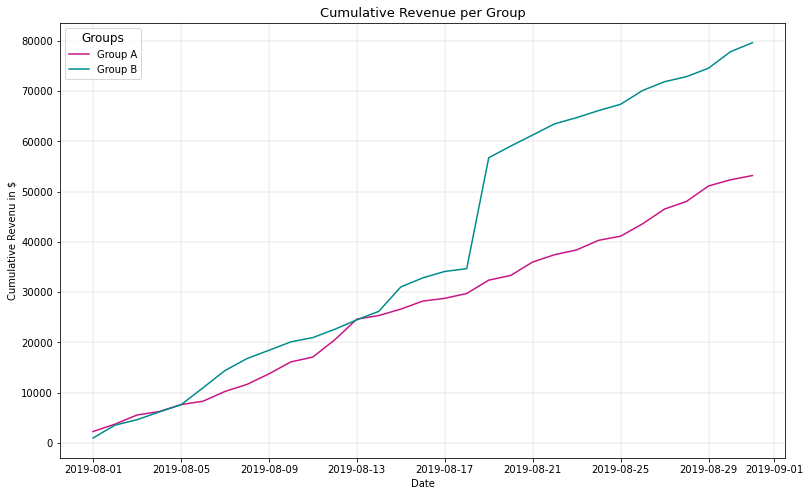

In [37]:
plt.figure(figsize=(13, 8))
plt.plot(cumulative_ra['date'], cumulative_ra['revenue'], label='A', color='mediumvioletred')
plt.plot(cumulative_rb['date'], cumulative_rb['revenue'], label='B', color='darkcyan')
plt.legend(['Group A','Group B'],loc='best', title="Groups", fontsize=10, title_fontsize=12)
plt.title('Cumulative Revenue per Group', size=13)
plt.ylabel('Cumulative Revenu in $', size=10)
plt.xlabel('Date', size=10)
plt.grid(linewidth = 0.3)
plt.show()

#### Conclusions and Conjectures

As we can see from the graph above, presenting each group's cumulative revenue over a period of time, both groups' cumulative revenue is rising steadily throughout the whole test. However, group B has a steep hike in revenue around August 18th and then revenue stabilizes again - this might imply either a surge in the number of orders placed or few orders that are more expansive. Such outliers, or anomalies, will be examined at a later point of the test. 

Overall, both groups cumulative revenue is good. 

### Cumulative Average Order Size per Group

#### Calculating and Graphing Average Order Size per Group

To calculate each groups' average order size, I will divide each group's revenue by its number of orders. I will visualize this in a graph. 

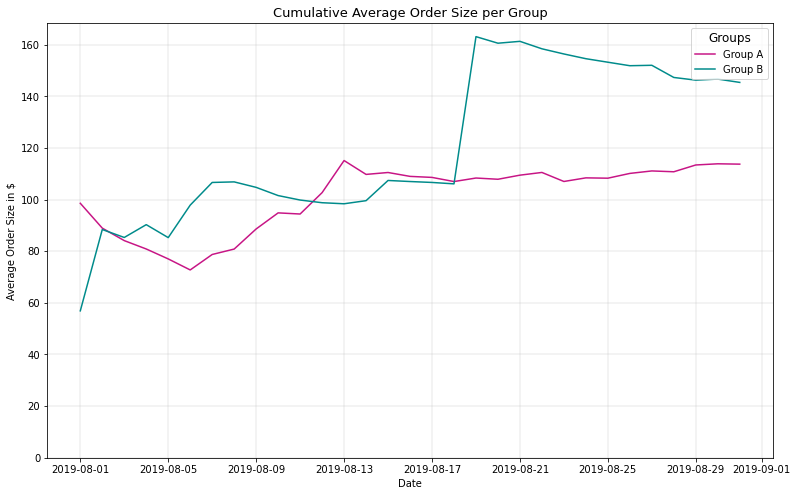

In [38]:
plt.figure(figsize=(13, 8))
plt.plot(cumulative_ra['date'], cumulative_ra['revenue']/cumulative_ra['orders'], label='A', color='mediumvioletred')
plt.plot(cumulative_rb['date'], cumulative_rb['revenue']/cumulative_rb['orders'], label='B', color='darkcyan')
plt.legend(['Group A','Group B'],loc='best', title="Groups", fontsize=10, title_fontsize=12)
plt.title('Cumulative Average Order Size per Group', size=13)
plt.ylabel('Average Order Size in $', size=10)
plt.xlabel('Date', size=10)
plt.grid(linewidth = 0.3)
plt.ylim(ymin=0)
plt.show()

#### Conclusions and Conjectures

We can see that both groups' cumulative average order sizes are erratic throughout the test, and while group A's average is fairly stable from mid-August, group B's was slowly declining after the steep hike noted in the previous section. This graph indicates that it is more likely that the hike is due to large order sizes rather than a larger number of orders. However, this will be further examined in this test. 

### Comparison of Relative Difference in Cumulative Average Order Size 


#### Calculating and Graphing The Relative Difference in Cumulative Average Order Size

In [39]:
merged_cr = cumulative_ra.merge(cumulative_rb, left_on='date', right_on='date', how='left', suffixes=['A', 'B']).rename(columns={'revenueA': 'revenue_a', 'revenueB':'revenue_b', 'ordersA':'orders_a', 'ordersB':'orders_b'})
merged_cr.head()


,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


For the purpose of calculating the relative difference in cumulative order size between group B and group A, I merged the "cumulative_ra" and "cumulative_rb" tables into one table "merged_cr". 

The relative difference will be calculated by subtracting 1 from the division of average order size of group B by that of group A ((average B/average A) - 1). 

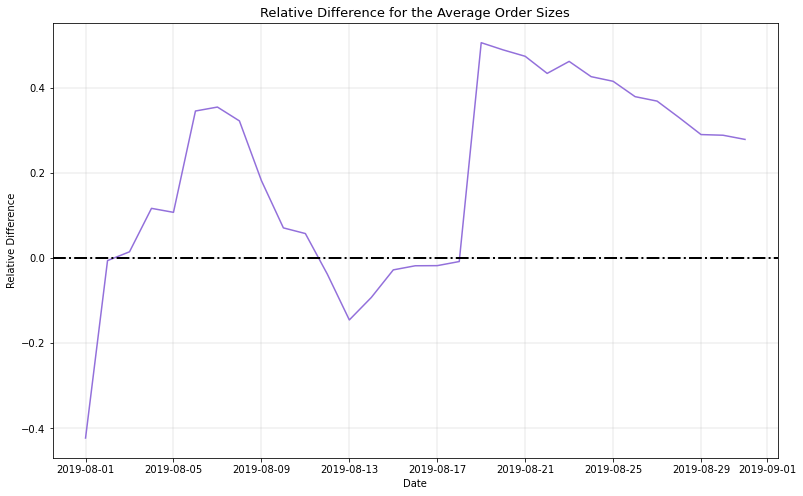

In [40]:
plt.figure(figsize=(13, 8))
plt.plot(merged_cr['date'], (merged_cr['revenue_b']/merged_cr['orders_b'])/(merged_cr['revenue_a']/merged_cr
                                                                            ['orders_a'])-1, color='mediumpurple')
plt.axhline(y=0, color='black', linestyle='-.', linewidth=2) 
plt.title('Relative Difference for the Average Order Sizes', size=13)
plt.ylabel('Relative Difference', size=10)
plt.xlabel('Date', size=10)
plt.grid(linewidth = 0.3)
plt.show()


#### Conclusions and Conjectures

We can see that there are spikes in the difference, both at around August 7th and August 18th. This means that there were probably large orders made by group B (as previously suspected) and some outliers/anomalies. 

### Each Group's Conversion Rate 

#### Calculating and Graphing Each Group's Conversion Rate 


In [41]:
d_cumulative['conversion'] = d_cumulative['orders']/d_cumulative['visits']
d_cumulative.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


I calculated the conversion rate of each group per day by dividing the number of orders by the number of visits. 

In [42]:
da_cumulative = d_cumulative[d_cumulative['group']=='A']
da_cumulative.head()


,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837


In [43]:
db_cumulative = d_cumulative[d_cumulative['group']=='B']
db_cumulative.head()


,date,group,orders,buyers,revenue,visits,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


I divided the previous table to represent each group separately, "da_cumulative" and "db_cumulative". 

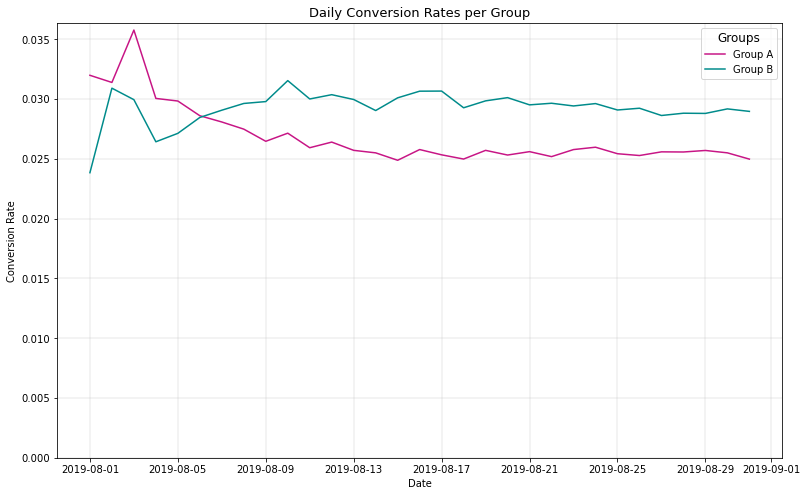

In [44]:
plt.figure(figsize=(13, 8))
plt.plot(da_cumulative['date'], da_cumulative['conversion'], label='A', color='mediumvioletred')
plt.plot(db_cumulative['date'], db_cumulative['conversion'], label='B', color='darkcyan')
plt.legend(['Group A','Group B'],loc='best', title="Groups", fontsize=10, title_fontsize=12)
plt.title('Daily Conversion Rates per Group', size=13)
plt.ylabel('Conversion Rate', size=10)
plt.xlabel('Date', size=10)
plt.ylim(ymin=0)
plt.grid(linewidth = 0.3)
plt.show()


As we can see, at first, group A's conversion rate was higher than that of group B's. Then, both spiked and dipped around the same time. However, once group A's conversion rate dipped, it kept slipping and then stabilized. On the other hand, group B's conversion rate recuperated and rose again. Both groups stabilized around the same time, August 21st, dipping at the end of August.  

#### Calculating and Graphing Relative Difference in the Daily Conversion Rates

In [45]:
mc_cumulative = da_cumulative[['date','conversion']
                             ].merge(db_cumulative[['date','conversion']], left_on='date', 
                             right_on='date', how='left', suffixes=['A', 'B']).rename(columns=
                            {'conversionA': 'conversion_a', 'conversionB':'conversion_b'})
mc_cumulative.head()


,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


I merged the previously separated tables for the conversion rates of group A and group B, so now there is a column for the conversion rate of each per date. 
The relative difference between the daily conversion rate of each group will be calculated by subtracting 1 from the division the conversion rate of group B's by group A's ((conversion rate b/conversion rate a)-1). 

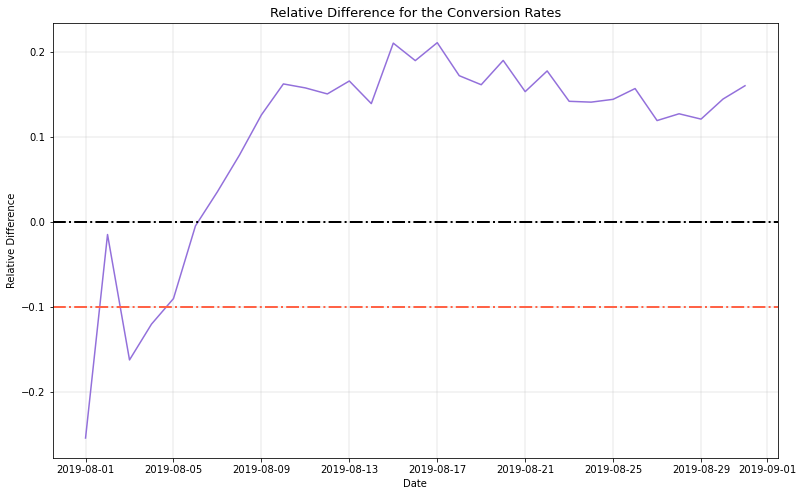

In [46]:
plt.figure(figsize=(13, 8))
plt.plot(mc_cumulative['date'], mc_cumulative['conversion_b']/
         mc_cumulative['conversion_a']-1, color='mediumpurple')
plt.axhline(y=0, color='black', linestyle='-.', linewidth=2)
plt.axhline(y=-0.1, color='tomato', linestyle='-.', linewidth=2)
plt.title('Relative Difference for the Conversion Rates', size=13)
plt.ylabel('Relative Difference', size=10)
plt.xlabel('Date', size=10)
plt.grid(linewidth = 0.3)
plt.show()

#### Conclusions and Conjectures

We can see that, at the beginning of the test, group B's conversion rate fell short of group A's conversion rate. Then it took the lead, only to lag behind again and then to climb. After that, it is still a little erratic and it's growing gradually at the end of the test. 

Overall, the conversion ratio is still a little erratic and unstable - perhaps because of anomalies and outliers in the data. 

### Anomalies in Orders' Amount and Prices

#### Orders per User

##### Calculating and Graphing Orders per User

In [47]:
orders_u = (filtered_orders.drop(['group', 'revenue', 'date'], 
                                 axis=1).groupby('visitorid', as_index=False).agg
            ({'transactionid': pd.Series.nunique})).rename(columns={'visitorid': 'users', 
            'transactionid':'orders'}).sort_values(by='orders', ascending=False)
orders_u.head()


,users,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


I created a table called "orders_u". I dropped the date, group and revenue columns from the "filtered_orders" data frame and grouped by the "visitorid" column and calculated the number of unique transactions each user made, then I renamed the columns and sorted by the number of orders, in descending order. 

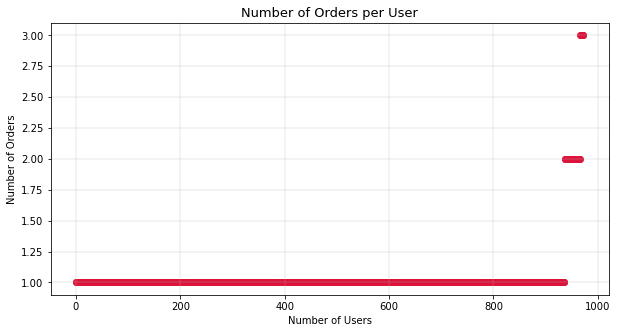

In [48]:
x_values = pd.Series(range(0,len(orders_u)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_u['orders'].sort_values(ascending=True), color='crimson')
plt.title('Number of Orders per User', size=13)
plt.ylabel('Number of Orders', size=10)
plt.xlabel('Number of Users', size=10)
plt.grid(linewidth = 0.3)
plt.show()

##### Conclusions and Conjectures

As we can see, the lion's share of users only made 1 order during the test period while very few users made 2 orders and even fewer, 3. 

##### Anomalies in the Number of Orders per User


In [49]:
np.percentile(orders_u['orders'], [95, 99])

array([1., 2.])

Above, I calculated the 95th and 99th percentiles for the number of orders per user. The 95th percentile is 1 order per user and the 99th is 2 orders per user. This means that no more than 5% of users placed more than 1 order and only 1% more than 2. 

**At this point, I conclude that any more than 2 orders is considered an anomaly.**

#### Order Prices


##### Calculating and Graphing Order Prices

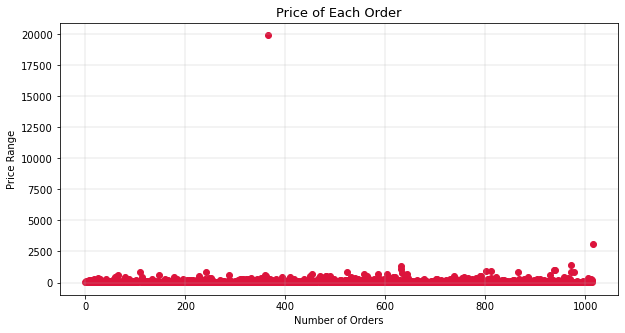

In [50]:
x_values = pd.Series(range(0, len(filtered_orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, filtered_orders['revenue'], color='crimson')
plt.title('Price of Each Order', size=13)
plt.ylabel('Price Range', size=10)
plt.xlabel('Number of Orders', size=10)
plt.grid(linewidth = 0.3)
plt.show()

As we can see, there are some outliers/anomalies. I will build an additional plot where the lion's share of order prices can be further examined. 


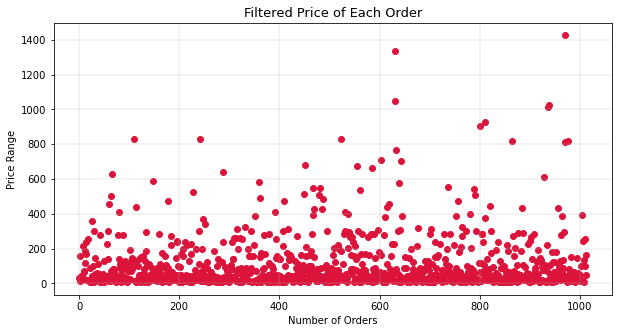

In [51]:
fil_rev = filtered_orders.query('revenue < 2500')
x_values = pd.Series(range(0, len(fil_rev['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, fil_rev['revenue'], color='crimson')
plt.title('Filtered Price of Each Order', size=13)
plt.ylabel('Price Range', size=10)
plt.xlabel('Number of Orders', size=10)
plt.grid(linewidth = 0.3)
plt.show()

##### Conclusions and Conjectures

From the scatted plot above, we can see that most of the orders placed by the users were priced at no more than about $1,500. 

Only a couple of orders were priced higher - one of the at $20,000 (here is our spike!). 
    


##### Anomalies in Orders Prices

In [52]:
np.percentile(filtered_orders['revenue'], [95, 99])

array([414.275, 830.3  ])

Above, I calculated the 95th and 99th percentiles for the order prices. The 95th percentile is $414 per order. 

The 99th is $830 per order. 

This means that no more than 5% of orders cost more than $414. 

Only 1% more than $830. 

**At this point, I conclude that orders priced over $414.275 is considered an anomaly.**

### Raw Data - Statistical Significance

#### Statistical Significance of the Difference in Conversion (Raw Data)

Hereinafter, I will test the Null Hypothesis (H0) that group A's conversion rate is equal to that of group B in the **raw data** (i.e., including outliers and anomalies).

If rejected, the Alternative Hypothesis (H1) is that group A's conversion rate is NOT equal to that of group B.
    

##### Calculating the Statistical Significance of the Difference in Conversion 

In [53]:
orders_ua = filtered_orders[filtered_orders
                            ['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : 
                            pd.Series.nunique}).rename(columns={'visitorid': 'users', 'transactionid':'orders'})
orders_ua.head()


,users,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


I created a table called "orders_ua" by grouping the users of group A by the visitor ID and counting their unique number of orders. Then, I renamed the columns. 

In [54]:
orders_ub = filtered_orders[filtered_orders
                            ['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : 
                            pd.Series.nunique}).rename(columns={'visitorid': 'users', 'transactionid':'orders'})
orders_ub.head()


,users,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


I created a table for the group B users, using the same technique as before. I called in "orders_ub". 

In [55]:
sample_a = pd.concat([orders_ua['orders'],
                      pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() 
                      - len(orders_ua['orders'])), name='orders')],axis=0)
sample_a.head()


0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

I created a list of indices called "sample_a" using pd.concat() - this list has the number of orders for each user and zeroes for users who didn't place any orders (subtracting the sum of visits by the group members from the length of orders_ua). 

In [56]:
sample_b = pd.concat([orders_ub['orders'],
                      pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()
                      - len(orders_ub['orders'])), name='orders')],axis=0)
sample_b.head()


0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

I created the same list for group B, called it "sample_b".

In [57]:
alpha = 0.05

results = stats.mannwhitneyu(sample_a, sample_b)[1]

print('p-value: {:.3f}'.format(results))

if results < alpha:
    print("We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05")
else:
    print("We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05") 
print("The relative loss/gain of group B is {:.0f}%".format(((sample_b.mean()/sample_a.mean()-1))*100))


p-value: 0.011
We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05
The relative loss/gain of group B is 16%


##### Conclusions and Conjectures

Based on the raw data, using 0.05 significance level, the conversion rate of groups A and B is unequal. 

The alpha (0.05) is higher than the p-value - this means we reject the null hypothesis that the conversion rate of the two groups is equal. It should also be noted that the relative gain of group B is 16%.
 


#### Statistical Significance of the Difference in Average Order Size (Raw Data)


Hereinafter, I will test the Null Hypothesis (H0) that group A's average order size is equal to that of group B in the **raw data** (i.e., including outliers and anomalies).

If rejected, the Alternative Hypothesis (H1) is that group A's average order size is NOT equal to that of group B.
    


##### Calculating the Statistical Significance of the Difference in Average Order Size 

In [58]:
alpha = 0.05

results = stats.mannwhitneyu(filtered_orders[filtered_orders['group']=='A']
                             ['revenue'], filtered_orders[filtered_orders['group']=='B']['revenue'])[1]

print('p-value: {0:.3f}'.format(results))

if results < alpha:
    print("We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05")
else:
    print("We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05") 
print("The relative loss/gain of group B is {0:.1f}%".format((filtered_orders[filtered_orders['group']=='B']['revenue'].mean()/filtered_orders[filtered_orders['group']=='A']['revenue'].mean()-1)*100))


p-value: 0.862
We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05
The relative loss/gain of group B is 27.8%


##### Conclusions and Conjectures

Based on the raw data, using 0.05 significance level, the average order size of groups A and B is equal.

The p-value is higher than the alpha (0.05) - this means that we can't reject the null hypothesis that the average order size of the two groups is equal. It should also be noted that group B's average order size is much bigger than it is for group A.


### Filtered Data - Statistical Significance

#### Statistical Significance of the Difference in Conversion (Filtered Data)

Hereinafter, I will test the Null Hypothesis (H0) that group A's conversion rate is equal to that of group B in the **filtered data** (i.e., excluding outliers and anomalies).

If rejected, the Alternative Hypothesis (H1) is that group A's conversion rate is NOT equal to that of group B.
    


##### Calculating the Statistical Significance of the Difference in Conversion 

In [64]:
abnormal_u = pd.concat([pd.concat([orders_ua[orders_ua['orders'] > 2]['users'], 
                      orders_ub[orders_ub['orders'] > 2]['users']], axis = 0), filtered_orders[filtered_orders['revenue'] > 414.275]
                        ['visitorid']], axis = 0).drop_duplicates().sort_values()


I created a list of users (of both groups) who have more than 2 orders (the anomaly I previously defined) and of orders (of users of both groups) who placed orders priced over $414.275 (the anomaly I previously defined) - I called it "abnormal_u".  


In [60]:
alpha = 0.05

sample_af = pd.concat([orders_ua[np.logical_not(orders_ua['users'].isin(abnormal_u))]['orders'],
                       pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()
                                                    - len(orders_ua['orders'])),name='orders')],axis=0)

sample_bf = pd.concat([orders_ub[np.logical_not(orders_ub['users'].isin(abnormal_u))]['orders'],
                       pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()
                                                    - len(orders_ub['orders'])),name='orders')],axis=0)


results = stats.mannwhitneyu(sample_af, sample_bf)[1]

print('p-value: {0:.3f}'.format(results))

if results < alpha:
    print("We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05")
else:
    print("We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05") 
print("The relative loss/gain of group B is {0:.1f}%".format((sample_bf.mean()/sample_af.mean()-1)*100))

p-value: 0.012
We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05
The relative loss/gain of group B is 18.2%


##### Conclusions and Conjectures

Based on the filtered data, using 0.05 significance level, the conversion rate of groups A and B is unequal.

The alpha (0.05) is higher than the p-value - this means we reject the null hypothesis that the conversion rate of the two groups is equal. It should also be noted that the relative gain of group B is 18.2% - **by removing the anomalies, the p-value is smaller but group B's relative gain grew**.
 

#### Statistical Significance of the Difference in Average Order Size (Filtered Data)


Hereinafter, I will test the Null Hypothesis (H0) that group A's average order size is equal to that of group B in the **filtered data** (i.e., excluding outliers and anomalies).

If rejected, the Alternative Hypothesis (H1) is that group A's average order size is NOT equal to that of group B.
    


##### Calculating the Statistical Significance of the Difference in Average Order Size 

In [61]:
import warnings
warnings.filterwarnings('ignore')
alpha = 0.05

results = stats.mannwhitneyu(filtered_orders[np.logical_and(filtered_orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormal_u)))]['revenue'],filtered_orders[np.logical_and(filtered_orders['group']=='B',np.logical_not(filtered_orders['visitorid'].isin(abnormal_u)))]['revenue'])[1]

print('p-value: {:.3f}'.format(results))

if results < alpha:
    print("We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05")
else:
    print("We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05") 
print("The relative loss/gain of group B is {:.1f}%".format((filtered_orders[np.logical_and(filtered_orders['group']=='B',np.logical_not(filtered_orders['visitorid'].isin(abnormal_u)))]['revenue'].mean()/filtered_orders[np.logical_and(filtered_orders['group']=='A',np.logical_not(filtered_orders['visitorid'].isin(abnormal_u)))]['revenue'].mean() - 1)*100))


p-value: 0.680
We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05
The relative loss/gain of group B is -4.7%


##### Conclusions and Conjectures

Based on the filtered data, using 0.05 significance level, the average order size of groups A and B is equal.

The p-value is higher than the alpha (0.05) - this means that we can't reject the null hypothesis that the average order size of the two groups is equal. It should also be noted that group B's average order size is smaller by 4.7% than it is for group A.

**By removing the anomalies, the p-value is larger but group B's average order size shrank by more than 30%**.


### Decision Based on the Test Results


**Final Decision: Stop the test, group B is the leader of the two groups.** 

* Both raw and filtered data revealed unequal conversion rate between groups A and B.
* Neither raw or filtered data revealed that average order size of groups A and B is unequal.
* Recalling a previously shown graph, displaying the difference in conversion between the groups, we can see that group B's results are better than group A's and actually seem to be improving after a slight dip. Moreover, once the anomalies were removed group B's results were even higher, at 18%. 


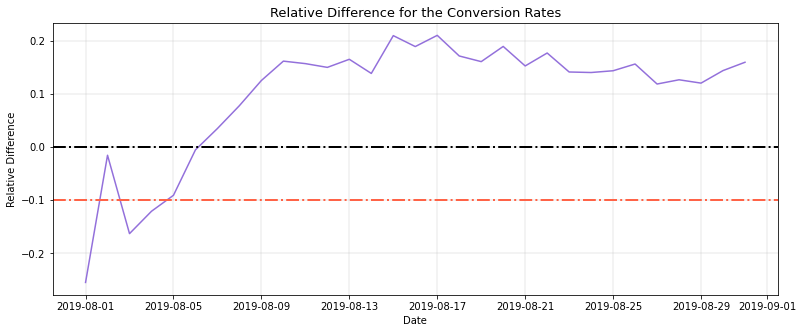

In [62]:
plt.figure(figsize=(13, 5))
plt.plot(mc_cumulative['date'], mc_cumulative['conversion_b']/
         mc_cumulative['conversion_a']-1, color='mediumpurple')
plt.axhline(y=0, color='black', linestyle='-.', linewidth=2)
plt.axhline(y=-0.1, color='tomato', linestyle='-.', linewidth=2)
plt.title('Relative Difference for the Conversion Rates', size=13)
plt.ylabel('Relative Difference', size=10)
plt.xlabel('Date', size=10)
plt.grid(linewidth = 0.3)
plt.show()

* Recalling a previously shown graph, displaying the difference in average order size between the groups, we can see that group B's results were better than group A's, at times higher by more than 20%-40%. However, this was with the anomalies. Without the anomalies the difference is negative (-4.7%) - all things considered, it doesn't necessarily mean the group B won't catch up. 


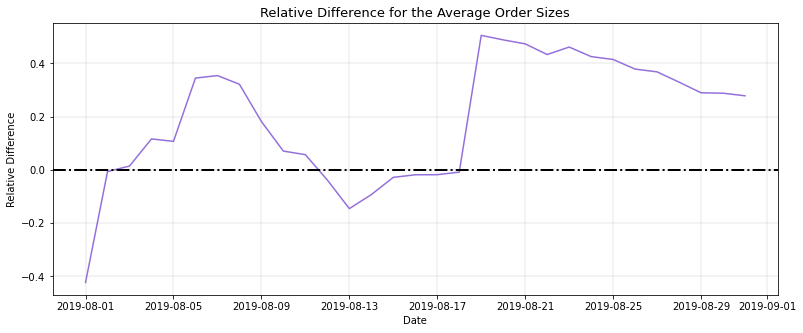

In [63]:
plt.figure(figsize=(13, 5))
plt.plot(merged_cr['date'], (merged_cr['revenue_b']/merged_cr['orders_b'])/(merged_cr['revenue_a']/merged_cr
                                                                            ['orders_a'])-1, color='mediumpurple')
plt.axhline(y=0, color='black', linestyle='-.', linewidth=2) 
plt.title('Relative Difference for the Average Order Sizes', size=13)
plt.ylabel('Relative Difference', size=10)
plt.xlabel('Date', size=10)
plt.grid(linewidth = 0.3)
plt.show()

## Summary and Final Conclusions

In this analysis I worked with 3 data frames:
1. Hypotheses;
2. Orders;
3. Visits.

At first glance, the data seemed intact, except for some incorrect data types and capital letters in columns' names. There were no missing values in the data frames.

In the data preprocessing section I took the following steps: 
1. Turned the columns' names in the "orders" data frame to lowercase letters.
2. Checked whether there were any duplicate rows in the "orders" and "visits" data frames. 
3. Turned the "date" column in the "orders" and "visits" data frames to datetime data types. 
4. Located 58 users in the "orders" data frame that were both in group A and in group B, users that would compromise the test.
5. Created a new data frame called "filtered_orders", without said problematic users. Thus, this data frame now has 1016 rows and 5 columns.
6. Checked whether there are dates with more than 3 groups or more than 2 unique groups - there are none.


In the ICE/RICE prioritizing section:
1. Found that the hypothesis with the highest ICE priority is hypothesis 8, next are 0 and 7, while the hypotheses with the lowest ICE priority are 5, 3 and 4.
2. Found that the hypothesis with the highest RICE priority is hypothesis 7, next are 2 and 6, while the hypotheses with the lowest RICE priority are 5, 1 and 4. 
3. Compared the two and found the following:
* The only difference between the two is: **R for Reach - how many users will be affected by the update**.
* If the R is high, then the priority rises - for example, hypothesis 7 is to add a subscription form that will help the store compile a mailing list - this has the highest reach value, meaning you will reach all users that subscribe. This hypothesis is has also medium-high impact and confidence values and medium effort value - making it third in ICE priorities. 
* On the other hand, hypotheses 8 and 0, the first and second highest ICE priorities have low reach values, 1 and 3, respectively. Hypothesis 8 will only reach certain users at certain times (on their birthdays) and hypothesis 0, by its own account, will reach only 30% of users. 
* Hypotheses 2 and 6, second and third highest RICE priorities have 8 and 5 reach values, respectively. Both aim to boost the conversion of users to buyers. Even though hypothesis 6 has medium reach value it is high in confidence and low on effort - making it a win-win. 
* Another glaring difference in ICE/RICE priority are hypotheses 3 and 1, both the second to last in each. Hypothesis 3 has low impact and low confidence (both 3) and high effort - making it low in ICE priority. However, since by nature it will reach all users using the store's website, it has high reach value - removing it from the bottom 3 in RICE priority.
* Hypothesis 1 has medium impact and confidence values and very high effort value (10) - in addition, its reach value is low (2). It might seem that adding a delivery service will affect a lot of users. But perhaps this service will be pricier than other delivery options given the store's online customers and they will prefer longer delivery at lower cost - hence the low reach. 

The Analysis of the A/B Test:
    
1. Both groups' cumulative revenue is rising steadily throughout the whole test. However, group B has a steep hike in revenue around August 18th and then revenue stabilizes again - this might imply either a surge in the number of orders placed or few orders that are more expansive. 
2. Both groups' cumulative average order sizes are erratic throughout the test, and while group A's average is fairly stable from mid-August, group B's was slowly declining after the steep hike previously noted. 
3. There are spikes in the difference, both at around August 7th and August 18th. Probably due to large orders made by group B (as previously suspected) and some outliers/anomalies.
4. Group A's conversion rate was higher than that of group B's. Then, both spiked and dipped around the same time. However, once group A's conversion rate dipped, it kept slipping and then stabilized. On the other hand, group B's conversion rate recuperated and rose again. Both groups stabilized around the same time, August 21st, dipping at the end of August.
5. At the beginning of the test, group B's conversion rate fell short of group A's. Then it took the lead, only to lag behind again and then climb. After that, it is still a little erratic and it's growing gradually at the end of the test. Overall, the conversion ratio is still a little erratic and unstable.
6. The 95th percentile is 1 order per user and the 99th is 2 orders per user. This means that no more than 5% of users placed more than 1 order and only 1% more than 2. **I concluded that any more than 2 orders is considered an anomaly**.
7. The 95th percentile is 414 USD per order. The 99th is 830 USD per order. This means that no more than 5% of orders cost more than 414 USD. Only 1% more than 830 USD. **I conclude that orders priced over 414.275 USD is considered an anomaly**.


* Raw Data - Statistical Significance

1. Based on the raw data, using 0.05 significance level, the conversion rate of groups A and B is unequal. The alpha (0.05) is higher than the p-value - this means we reject the null hypothesis that the conversion rate of the two groups is equal. It should also be noted that the relative gain of group B is 16%.
2. Based on the raw data, using 0.05 significance level, the average order size of groups A and B is equal. The p-value is higher than the alpha (0.05) - this means that we can't reject the null hypothesis that the average order size of the two groups is equal. It should also be noted that group B's average order size is much bigger than it is for group A.

* Filtered Data - Statistical Significance

1. Based on the filtered data, using 0.05 significance level, the conversion rate of groups A and B is unequal. The alpha (0.05) is higher than the p-value - this means we reject the null hypothesis that the conversion rate of the two groups is equal. It should also be noted that the relative gain of group B is 18.2% - **by removing the anomalies, the p-value is smaller but group B's relative gain grew**.
2. Based on the filtered data, using 0.05 significance level, the average order size of groups A and B is equal. The p-value is higher than the alpha (0.05) - this means that we can't reject the null hypothesis that the average order size of the two groups is equal. It should also be noted that group B's average order size is smaller by 4.7% than it is for group A.

**By removing the anomalies, the p-value is larger but group B's average order size shrank by more than 30%**.

**Decision Based on the Test Results**

* Both raw and filtered data revealed unequal conversion rate between groups A and B.
* Neither raw or filtered data revealed that average order size of groups A and B is unequal.
* Difference in conversion between the groups - group B's results were better than group A's and actually seem to be improving after a slight dip. Moreover, once the anomalies were removed group B's results were even higher, at 18%. 
* Difference in average order size between the groups - group B's results were better than group A's, at times higher by more than 20%-40%. Without the anomalies the difference is negative (-4.7%) - all things considered, it doesn't necessarily mean the group B won't catch up. 
    
**Final Decision: Stop the test, group B is the leader of the two groups.** 






